In [5]:
from sklearn.datasets import fetch_california_housing

In [13]:
house_data = fetch_california_housing()
house_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [7]:
import sklearn

In [8]:
sklearn.__version__

'1.3.0'

In [10]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [51]:
# 使用两种方法装入X、y
# X = house_data['data']
# y = house_data['target']

X,y = fetch_california_housing(return_X_y = True)

In [52]:
y.shape

(20640,)

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=44)

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg.score(X_test, y_test)  # 与r2_score使用的方法相同


# r2_score(y_test, y_pred)

0.6455014587968856

In [47]:
clf = DecisionTreeRegressor(criterion = 'poisson',max_depth = 9)

In [50]:
from sklearn.model_selection import cross_validate
import numpy as np
cv_results = cross_validate(clf, X_train,y_train,cv=4)
print(np.mean(cv_results['test_score']))

0.7031135956591166


In [53]:
from sklearn.model_selection import GridSearchCV

parameters = {
#     'criterion':('squared_error', 'friedman_mse', 'absolute_error', 'poisson'),
    'criterion':'poisson',
    'max_depth':list(range(9,12)),
    }

gs = GridSearchCV(DecisionTreeRegressor(),parameters,cv=4)
gs.fit(X_train,y_train)


TypeError: Parameter grid for parameter 'criterion' needs to be a list or a numpy array, but got 'poisson' (of type str) instead. Single values need to be wrapped in a list with one element.

In [ ]:
print(f'最佳参数组合：{gs.best_params_}')
print(f'最后得分：{gs.best_score_}')

In [44]:
reg = DecisionTreeRegressor(criterion = 'poisson',max_depth = 9)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.7200493537579102

### 可视化

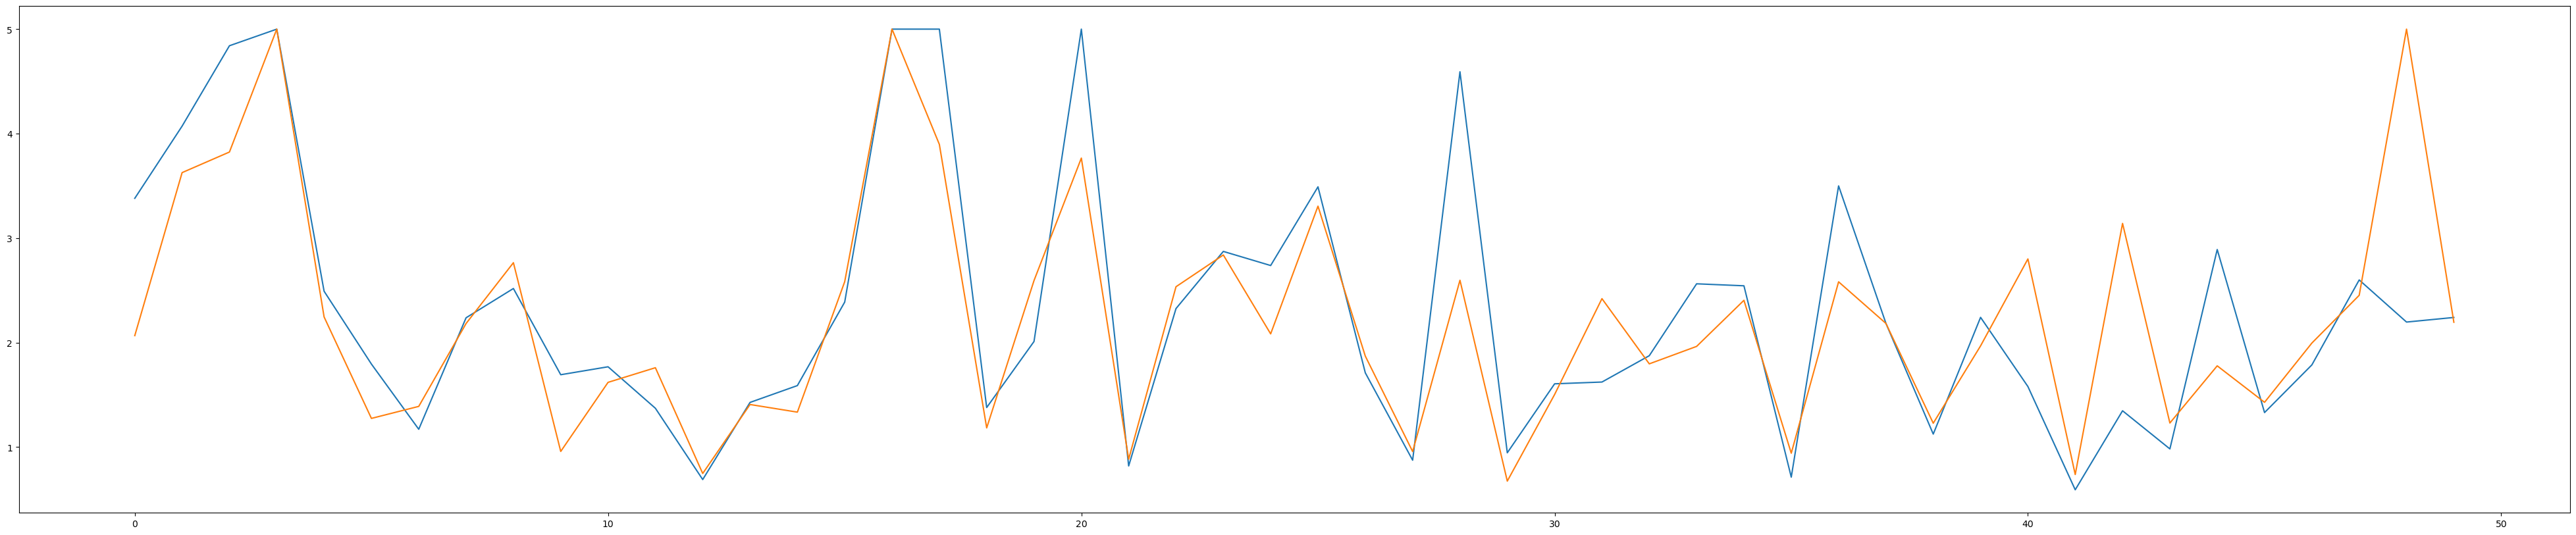

In [45]:
import matplotlib.pyplot as plt

x = list(range(50))

y1 = y_test[:50]
y2 = y_pred[:50]

plt.figure(figsize = (50,10))
plt.plot(x,y1)
plt.plot(x,y2)